<a href="https://colab.research.google.com/github/cagutierrezgu/My_Portfolio/blob/main/Clothes%20image%20classification/Models/Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Supervised. Tree decision classifier.

El modelo de K-Means visto anteriormente únicamente tiene en cuenta las imágenes, dadas por el arreglo *x*; sin embargo, es posible construir modelos de aprendizaje supervisado ya que dentro de los datos dispuestos se encuentran las etiquetas de cada una de las imágenes. Una de las posibilidades es construir un árbol de decisión para predecir la etiqueta de dichas imágenes. En este caso se hace necesario volver a disponer de conjuntos de prueba y entrenamiento, así que esto es lo que se presenta en la siguiente celda:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 60, test_size = 0.3)

A continuación, se entrenan diferentes árboles de desición al variar la profundidad de estos para determinar cuál es el valor apropiado para este hiperparámetro:

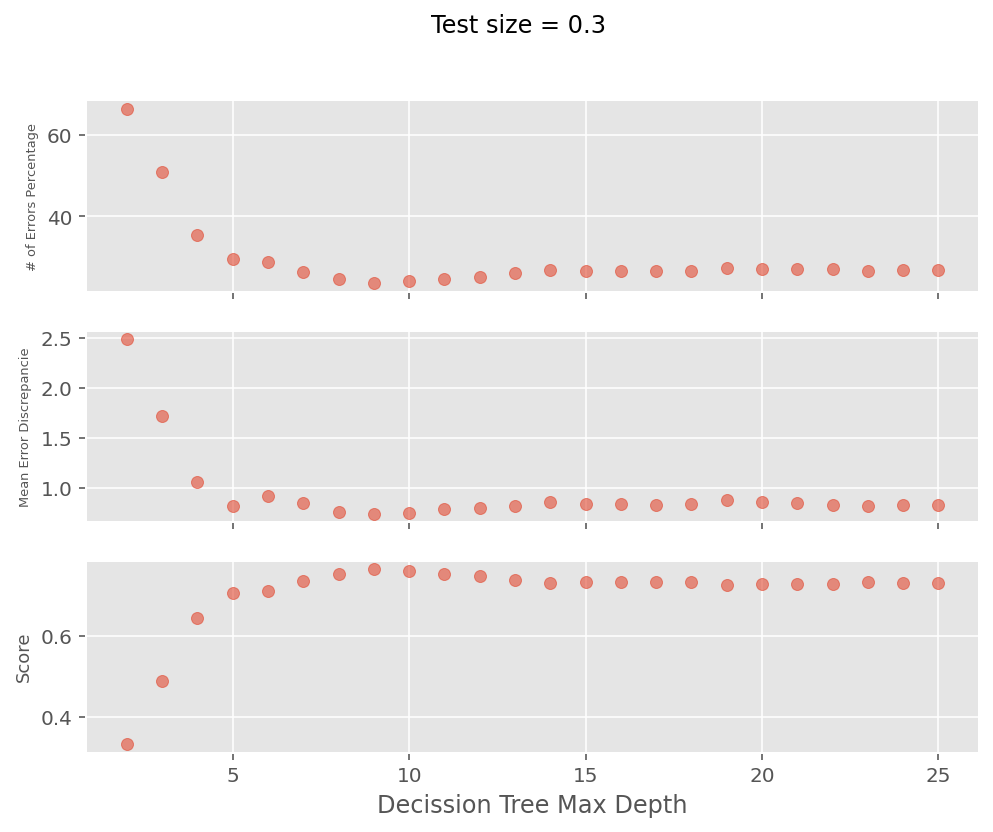

In [ ]:
y1 = [];y2 = [];y3 = []; xs = []
fig, axes = plt.subplots(3, figsize = (8,6), sharex=True)
for i in range(2,26):
    tree = DecisionTreeClassifier(max_depth = i, random_state=333)
    tree.fit(x_train,y_train)
    prediction = tree.predict(x_test)
    Discrepancie = np.abs(prediction-y_test)
    N = len(Discrepancie)
    Discrepancie1 = [i for i in Discrepancie if i!=0]
    n = len(Discrepancie1)
    y1.append(round(n*100/N,1))
    y2.append(Discrepancie.mean())
    y3.append(tree.score(x_test,y_test))
    xs.append(i)
axes[0].scatter(xs,y1, alpha=0.6)
axes[0].set_ylabel('# of Errors Percentage', fontsize = 6.5)
axes[1].scatter(xs,y2, alpha=0.6)
axes[1].set_ylabel('Mean Error Discrepancie', fontsize = 6.5)
axes[2].scatter(xs,y3, alpha=0.6)
axes[2].set_ylabel('Score', fontsize = 9)
axes[2].set_xlabel('Decission Tree Max Depth')
fig.suptitle(f'Test size = 0.3')
plt.show()

Las anteriores figuras dejan ver que para un conjunto de prueba del $30\%$, el modelo de árboles de decisión parece alcanzar su mejor rendimiento con una profundidad igual a 9, así que al tomar valores más grandes que este podría afirmarse que el modelo se sobreajusta.

Ahora es posible comparar las predicciones de dicho modelo con los etiquetas reales por medio de una matriz de confusión, así que escogiendo una profundidad de 9 se tiene:

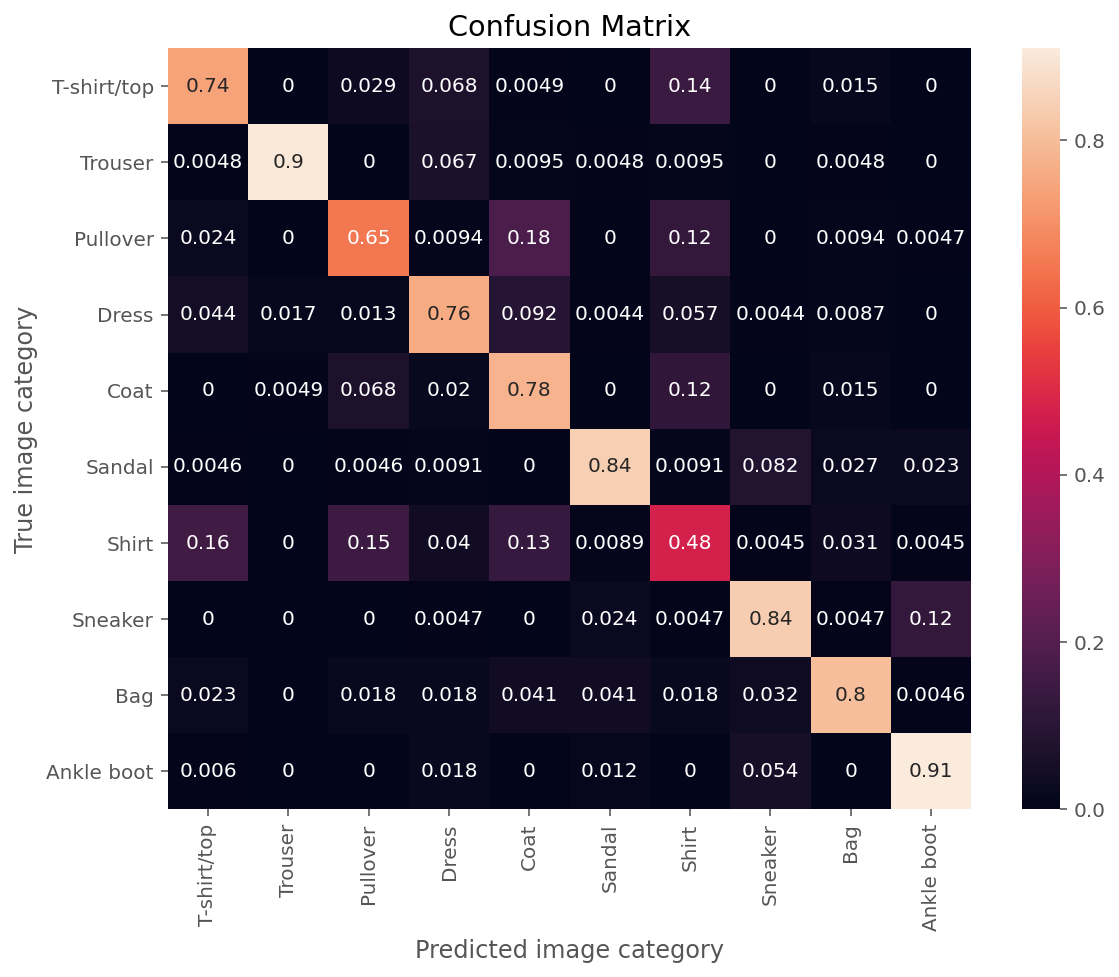

In [ ]:
tree = DecisionTreeClassifier(max_depth = 9, random_state=333)
tree.fit(x_train, y_train)
prediction = tree.predict(x_test)

plt.figure(figsize=(9,7))
cm = confusion_matrix(np.asarray(y_test),prediction)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
CM = sns.heatmap(cmn, xticklabels = labels, yticklabels = labels, annot = True)
CM.set_ylabel('True image category')
CM.set_xlabel('Predicted image category')
CM.set_title('Confusion Matrix')
plt.show()
plt.close()

La matriz de confusión permite ver que la categoría más problemática para clasificar por el modelo, son las camisetas (*Shirt*), ya que no alcanza siquiera el $50\%$ de acierto, por lo que sin esta prenda el score del modelo subiría considerablemente. En la sección de evaluación se hablará más acerca de las métricas para evaluar dicho modelo.

Por otro lado, resulta interesante ver gráficamente la clasificación que realiza el modelo de árboles de decisión y las condiciones que impone sobre los datos para clasificar las imágenes:

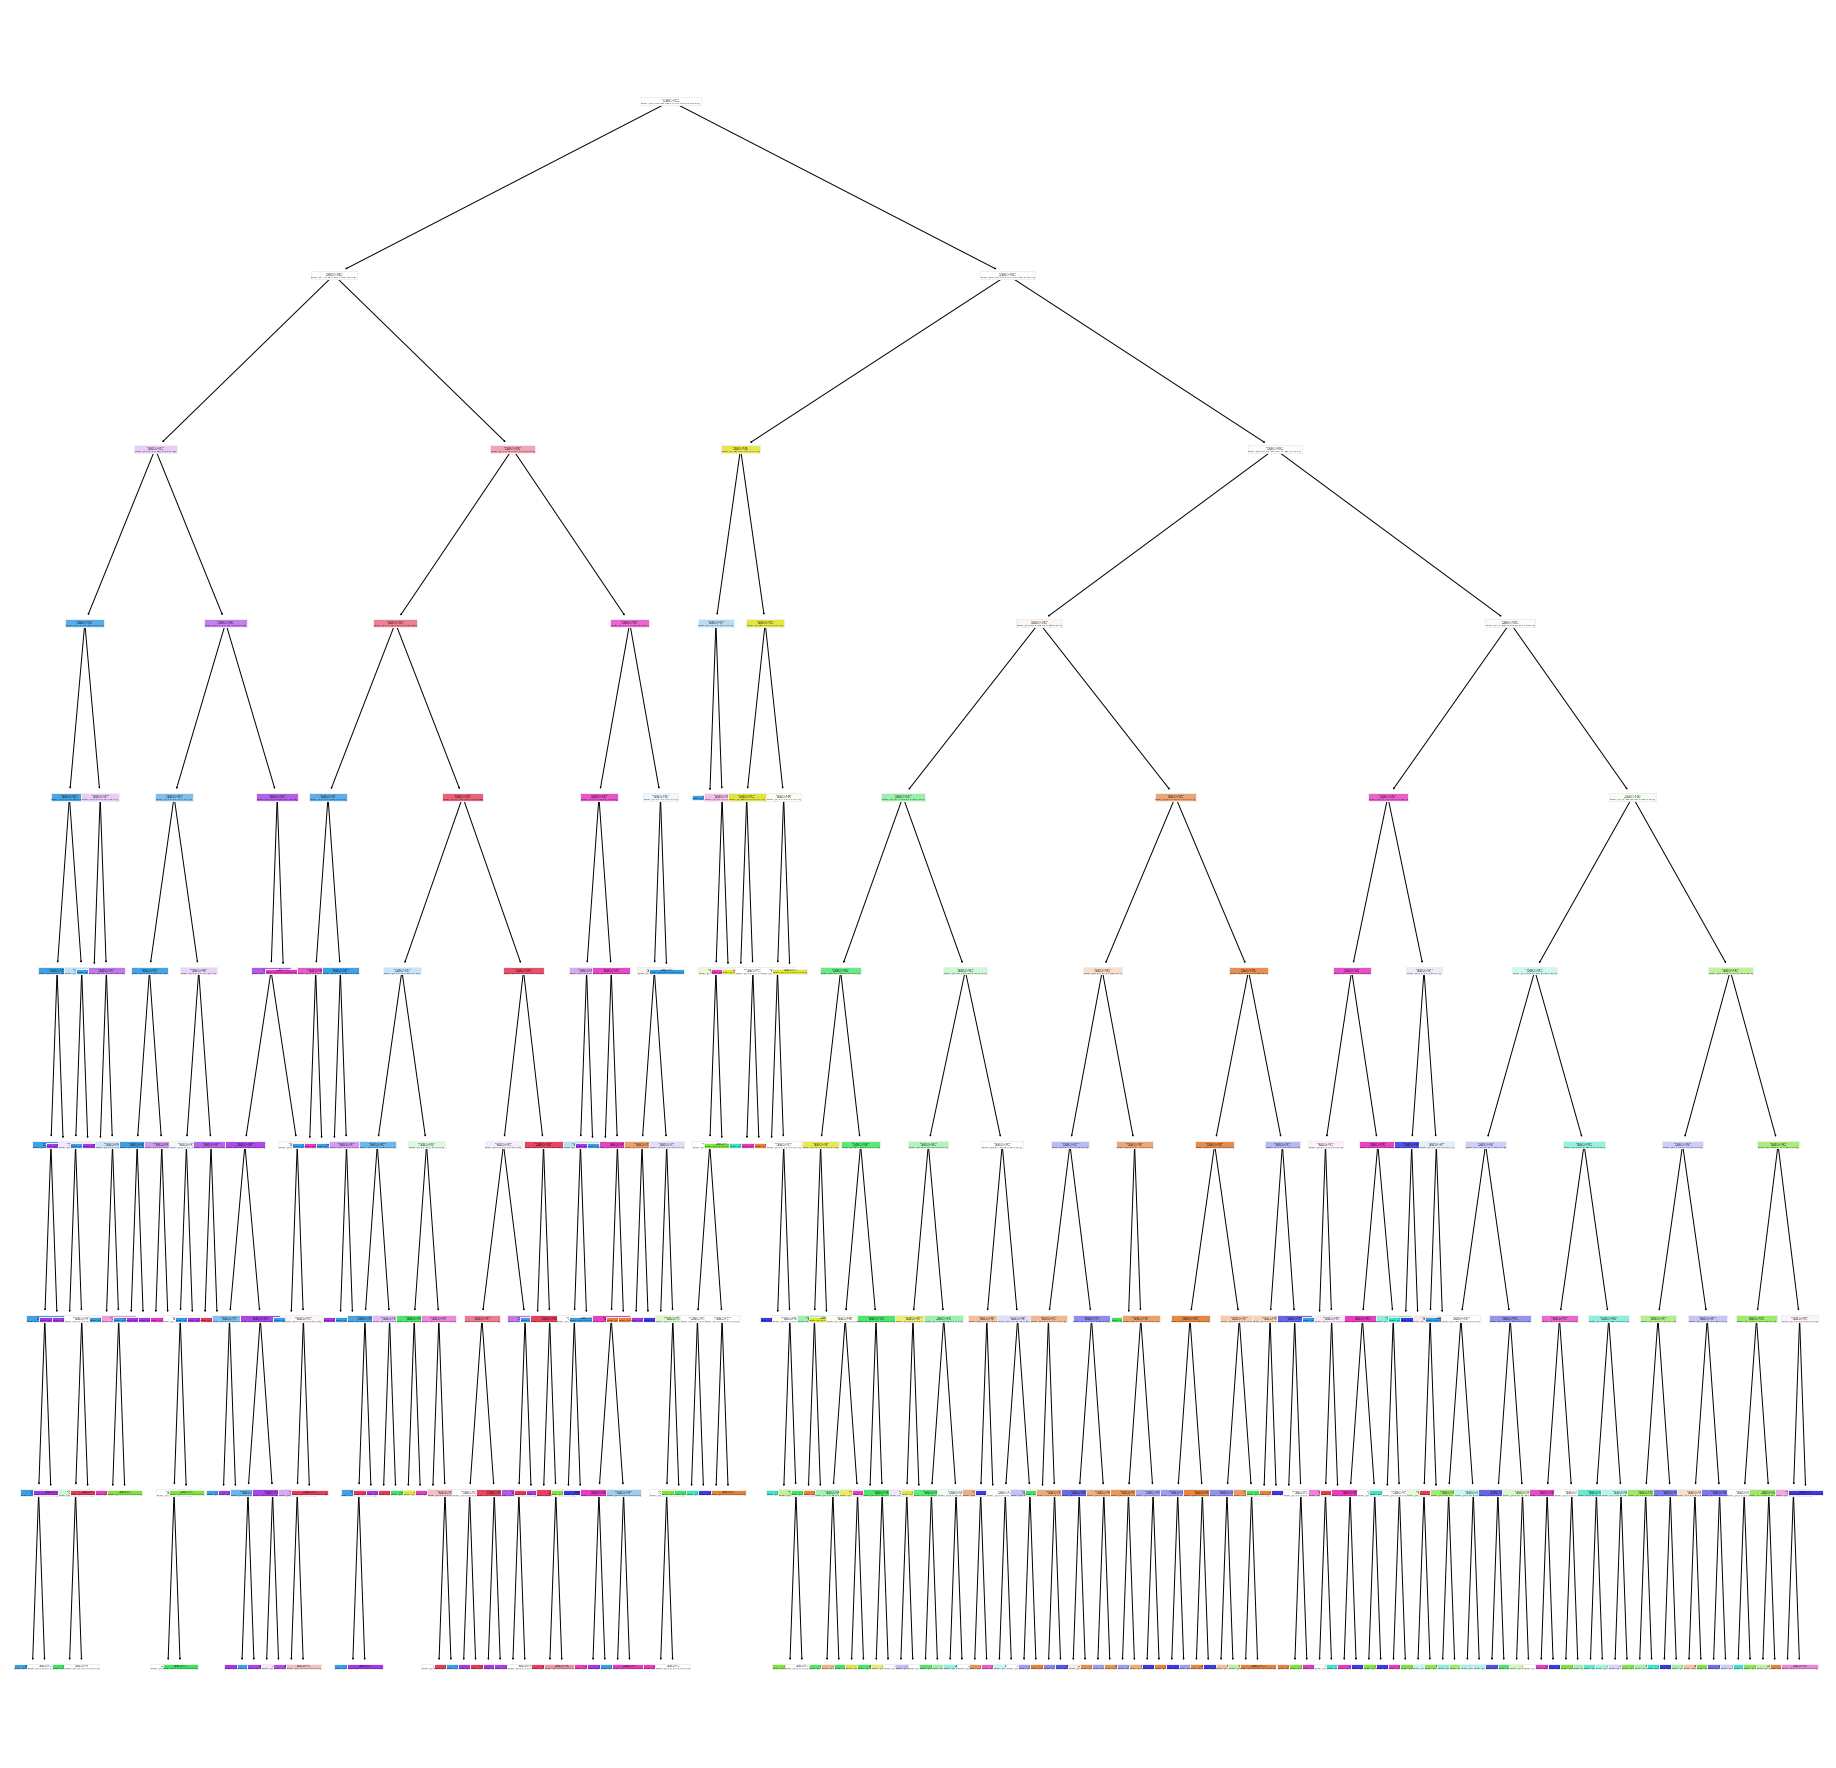

In [ ]:
fig = plt.figure(figsize=(16, 16))
sklearn.tree.plot_tree(tree, filled=True);

A pesar de que la anterior gráfica permite ver todas las ramificaciones del árbol en este modelo, debido a su profundidad no puede observarse las condiciones que impone en cada nodo para tomar las decisiones de clasificación.

El anterior estudio de la profundidad del árbol como un hiperparámetro puede hacerse también por medio de un GridSearch, la cual es una técnica para encontrar los mejores valores para una lista de hiperparámetros dados. En este caso, los hiperparámetros serán la profundidad del árbol y el criterio de partición del árbol:

In [ ]:
tree = DecisionTreeClassifier(random_state=333)
tree.fit(x_train, y_train)

param_grid = {
    "max_depth": range(2, 26),
    "criterion": ["gini", "entropy"]
  }
gsearch = model_selection.GridSearchCV(tree, 
                   param_grid=param_grid,
                   return_train_score=True, cv=3)

gsearch.fit(x_train, y_train)

print(f'Mejores hiperparámetros:\n {gsearch.best_params_}')
print(f'Mejor exactitud (validación): {gsearch.best_score_:.6f}')

Mejores hiperparámetros:
 {'criterion': 'gini', 'max_depth': 9}
Mejor exactitud (validación): 0.749592


Estos resultados dejan ver que la profundidad escogidad como la mejor gráficamente, sí era en realidad la de mejores resultados y que como primer cálculo del score se acerca a $0.75$.

Los procedimientos anteriores se repiten para los datos de menor dimensión del método PCA, así que haciendo una partición del conjunto original de datos en prueba y entrenamiento, y siguiendo con un análisis de profundidad para el árbol se tiene:

In [ ]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(pca_data, y, random_state = 60, test_size = 0.3)

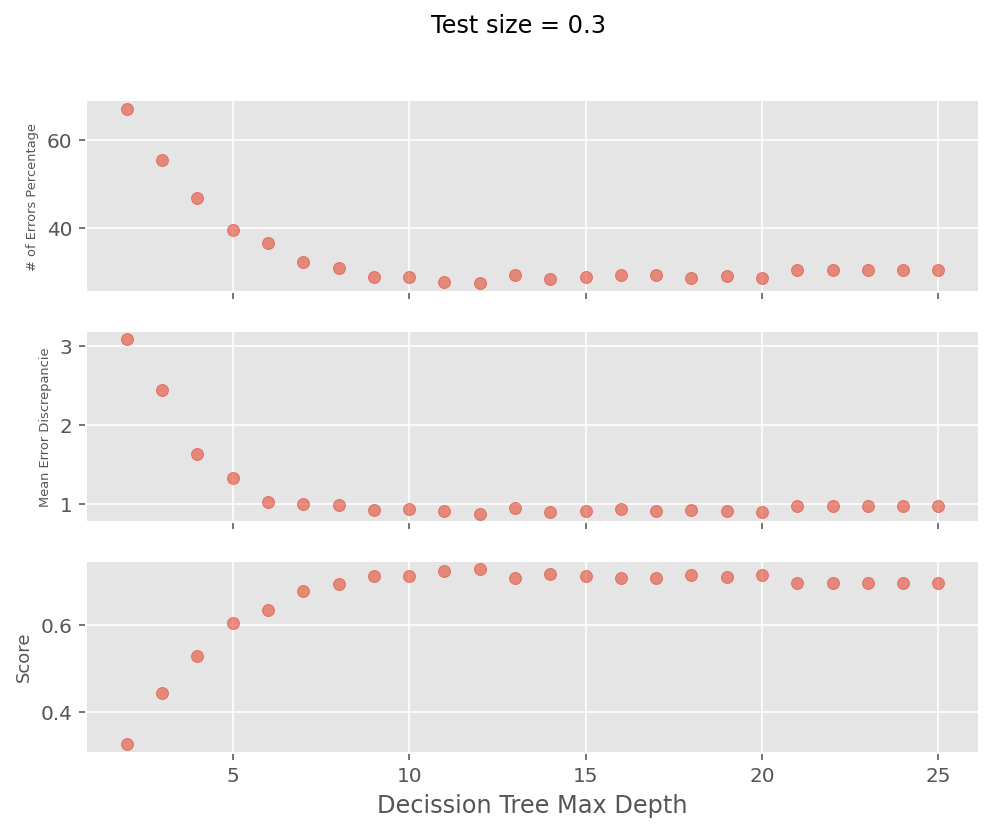

In [ ]:
y1 = [];y2 = [];y3 = []; xs = []
fig, axes = plt.subplots(3, figsize = (8,6), sharex=True)
for i in range(2,26):
    tree = DecisionTreeClassifier(max_depth = i, random_state=333)
    tree.fit(x_train_pca, y_train_pca)
    prediction = tree.predict(x_test_pca)
    Discrepancie = np.abs(prediction-y_test_pca)
    N = len(Discrepancie)
    Discrepancie1 = [i for i in Discrepancie if i!=0]
    n = len(Discrepancie1)
    y1.append(round(n*100/N,1))
    y2.append(Discrepancie.mean())
    y3.append(tree.score(x_test_pca,y_test_pca))
    xs.append(i)
axes[0].scatter(xs,y1, alpha=0.6)
axes[0].set_ylabel('# of Errors Percentage', fontsize = 6.5)
axes[1].scatter(xs,y2, alpha=0.6)
axes[1].set_ylabel('Mean Error Discrepancie', fontsize = 6.5)
axes[2].scatter(xs,y3, alpha=0.6)
axes[2].set_ylabel('Score', fontsize = 9)
axes[2].set_xlabel('Decission Tree Max Depth')
fig.suptitle(f'Test size = 0.3')
plt.show()

A primera vista puede observarse que este modelo debe ser más profundo para encontrar el mejor ajuste que retorne las mejores predicciones, es decir, la región de subajuste es mayor a la vista con el otro conjunto de datos.

Nuevamente, se grafica una matriz de confusión para comparar con las verdaderas etiquetas las predicciones que esta haciendo este modelo. Tomando una profundidad igual a 11 se tiene:

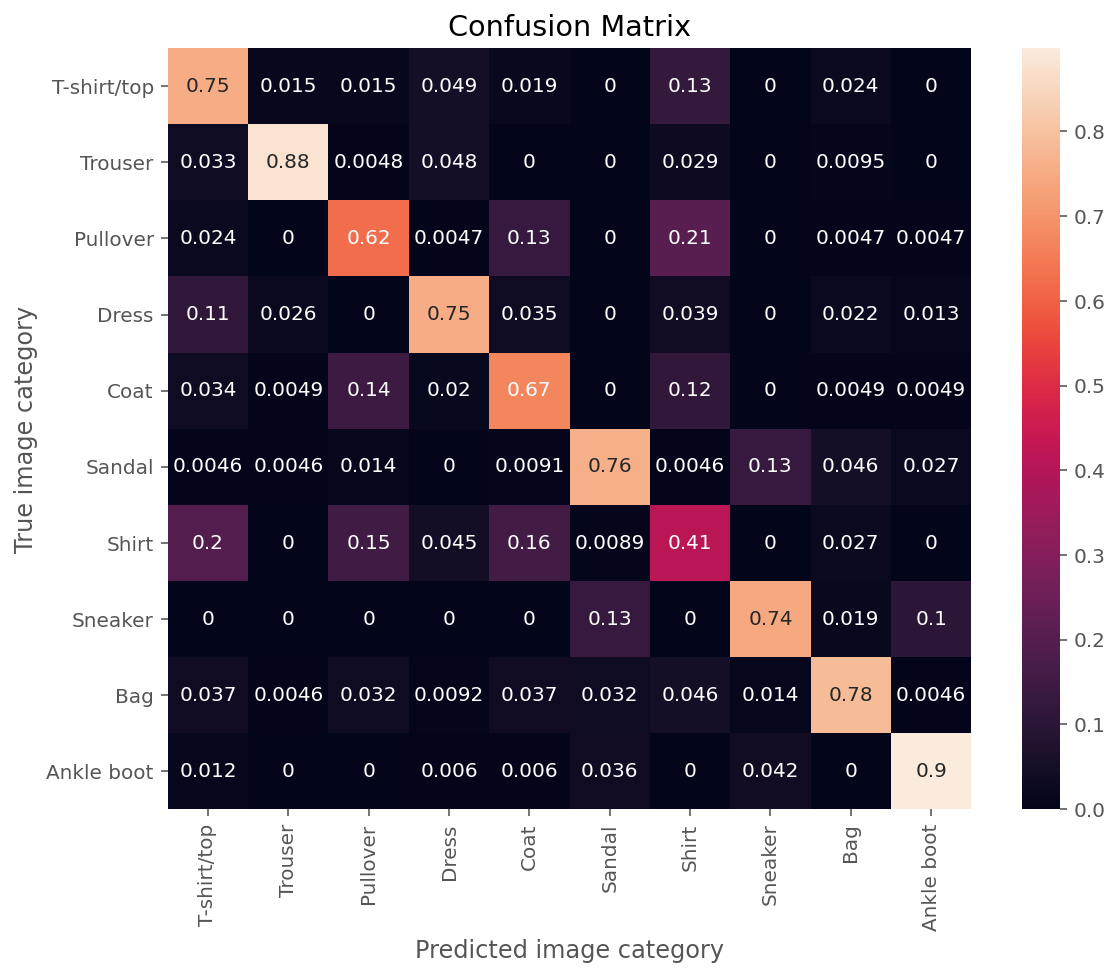

In [ ]:
tree = DecisionTreeClassifier(max_depth = 11, random_state=333)
tree.fit(x_train_pca, y_train_pca)
prediction = tree.predict(x_test_pca)

plt.figure(figsize=(9,7))
cm = confusion_matrix(np.asarray(y_test),prediction)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
CM = sns.heatmap(cmn, xticklabels = labels, yticklabels = labels, annot = True)
CM.set_ylabel('True image category')
CM.set_xlabel('Predicted image category')
CM.set_title('Confusion Matrix')
plt.show()
plt.close()

Los resultados de esta gráfica muestran un decrecimiento en la capacidad de predicción de las que también eran las dos peores categorías de predicción con el otro conjunto de datos: Shirt y Pullover. Más adelante se verá si esto se ve también reflejado en el score que arroja cada modelo.

El árbol de desición graficado para este último árbol se muestra en la siguiente figura:

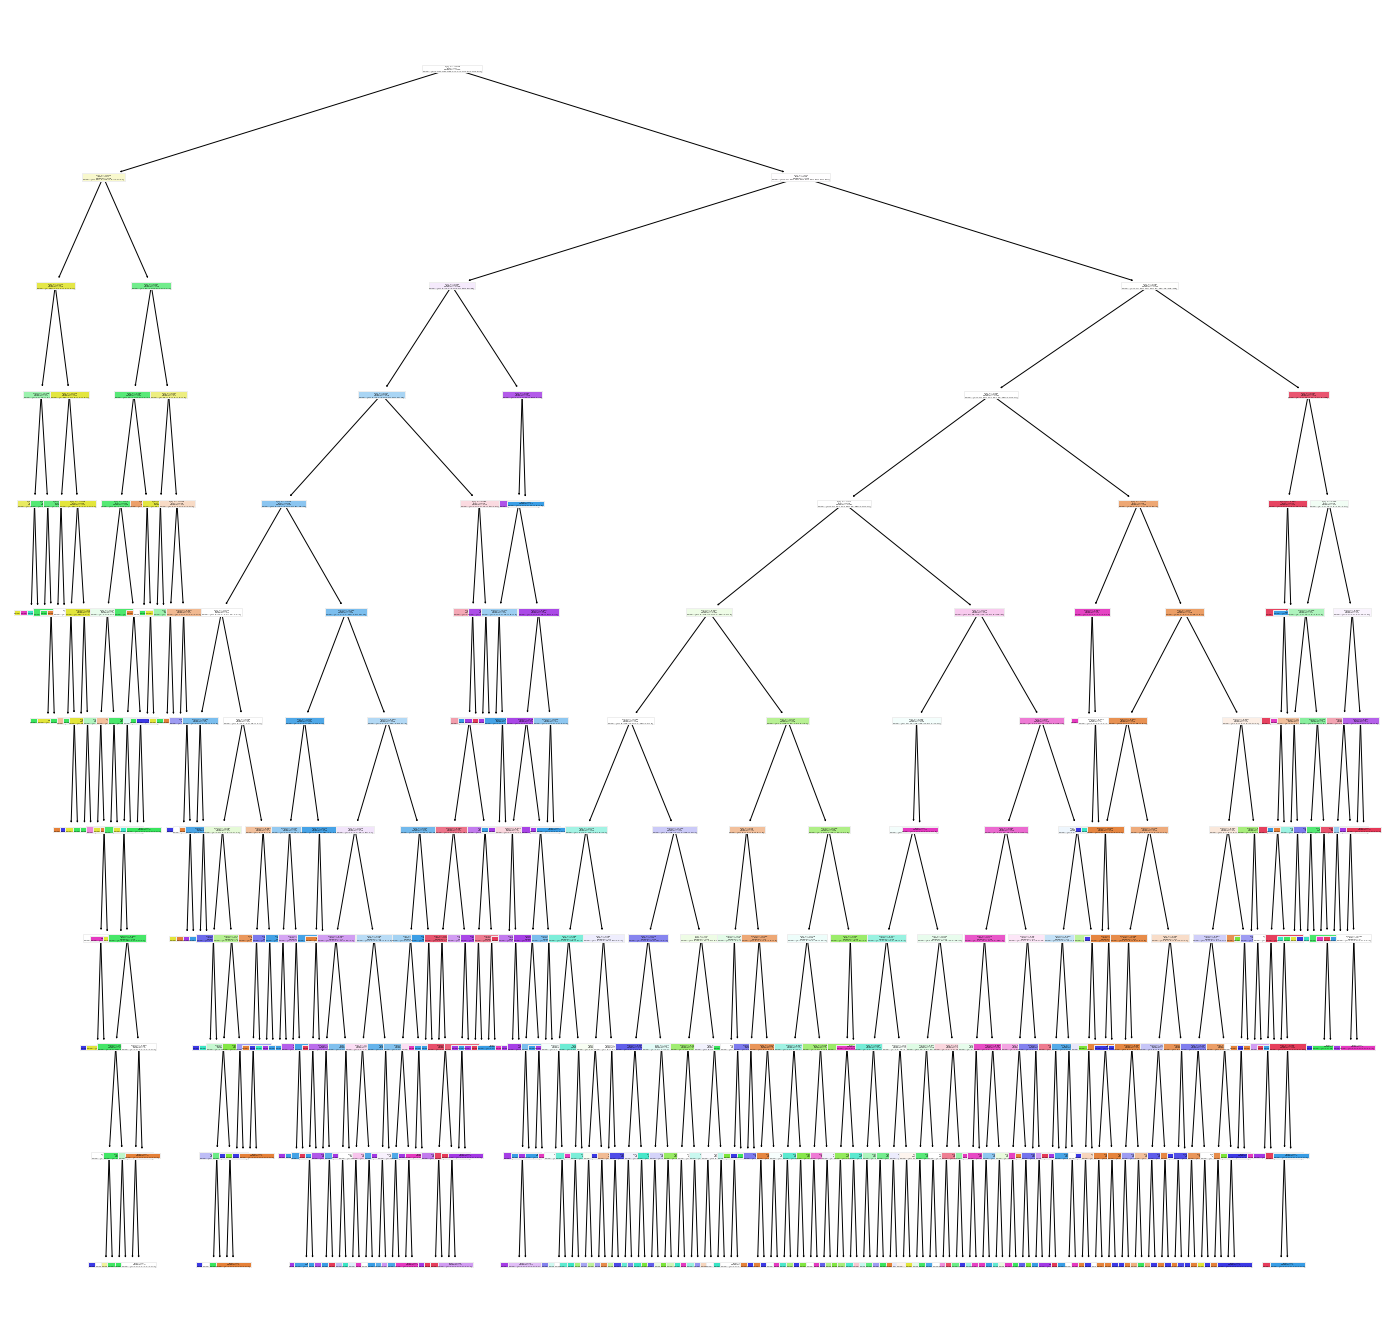

In [ ]:
fig = plt.figure(figsize=(12, 12))
sklearn.tree.plot_tree(tree, filled=True);

Al igual que en el anterior árbol graficado, no es posible distiguir las condiciones para realizar la clasificación e imponer las etiquetas. Así mismo, el método Gridsearch aplicado sobre este conjunto de datos con los mismo hiperparámetros será:

In [ ]:
tree = DecisionTreeClassifier(random_state=333)
tree.fit(x_train_pca, y_train)

param_grid = {
    "max_depth": range(2, 26),
    "criterion": ["gini", "entropy"],
  }
gsearch = model_selection.GridSearchCV(tree, 
                   param_grid=param_grid,
                   return_train_score=True, cv=3)

gsearch.fit(x_train_pca, y_train)

print(f'Mejores hiperparámetros:\n {gsearch.best_params_}')
print(f'Mejor exactitud (validación): {gsearch.best_score_:.6f}')

Mejores hiperparámetros:
 {'criterion': 'entropy', 'max_depth': 8}
Mejor exactitud (validación): 0.717143


Una de las diferencias encontradas respecto al otro árbol estudiado, es que el mejor criterio de partición varía en cada conjunto de datos, sin embargo, la profundidad adecuada para los mejores resultados es la misma, esto a pesar de que este último modelo parecía necesitar mayor profundidad para no quedar subajustado.